In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
import api_keys
apikey= os.environ["WKEY"]

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

## API Calls

In [80]:
def weather_info(city_name):
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
    query_url = url+ "&q=" + city_name
    weather_response = requests.get(query_url)
    if 'error_message' in weather_response:
        raise Exception(result['error_message'])
    return weather_response.json()


In [81]:
weather_data = []
for city in cities:
    results = weather_info(city)
    weather_data.append(results)
#weather_data =[weather_info(city) for city in cities]

In [82]:
city_info = []
lat = []
lon = []
temp = []
humd = []
clouds = []
wind = []

city_not_in_list = 0

for item in weather_data:
    try:
        city_info.append(item["name"])
        lat.append(item["coord"]["lat"])
        lon.append(item["coord"]["lon"])
        temp.append(item["main"]["temp"])
        humd.append(item["main"]["humidity"])
        clouds.append(item["clouds"]["all"])
        wind.append(item["wind"]["speed"])
    except KeyError:
        city_not_in_list +=1


In [83]:
city_not_in_list

61

In [116]:
cities_info = pd.DataFrame({"City": city_info,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Temperature(F)": temp,
                           "Humidity(%)":humd,
                           "Cloudiness(%)":clouds,
                           "Wind Speed(mph)": wind})
cities_info.count()

City               562
Latitude           562
Longitude          562
Temperature(F)     562
Humidity(%)        562
Cloudiness(%)      562
Wind Speed(mph)    562
dtype: int64

## Plot Charts

In [117]:
cities_info.head()

,City,Latitude,Longitude,Temperature(F),Humidity(%),Cloudiness(%),Wind Speed(mph)
0,Kavieng,-2.57,150.80,76.23,100,92,6.06
1,Faanui,-16.48,-151.75,80.28,100,0,14.56
2,Isangel,-19.55,169.27,71.19,100,24,13.89
3,Bluff,-23.58,149.07,67.77,78,80,7.96
4,Kapaa,22.08,-159.32,83.39,74,90,18.34


In [118]:
cities_info.to_csv("random_cities_weather.csv")

In [ ]:
# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

Text(0,0.5,'Latitude')

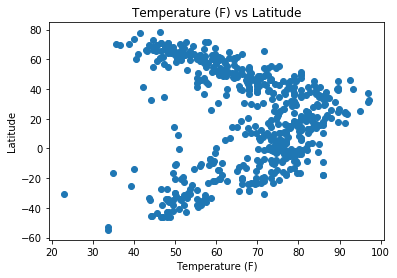

In [129]:
plt.scatter(cities_info["Temperature(F)"], cities_info["Latitude"])
plt.title("Temperature (F) vs Latitude")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")

Text(0,0.5,'Latitude')

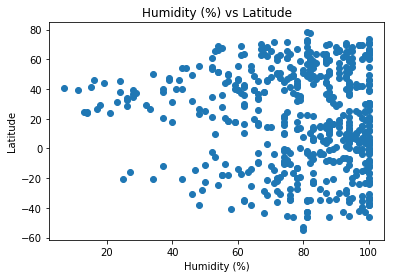

In [131]:
plt.scatter(cities_info["Humidity(%)"], cities_info["Latitude"])
plt.title("Humidity (%) vs Latitude")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")

Text(0,0.5,'Latitude')

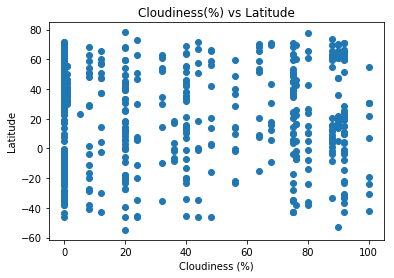

In [132]:
plt.scatter(cities_info["Cloudiness(%)"], cities_info["Latitude"])
plt.title("Cloudiness(%) vs Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")

Text(0,0.5,'Latitude')

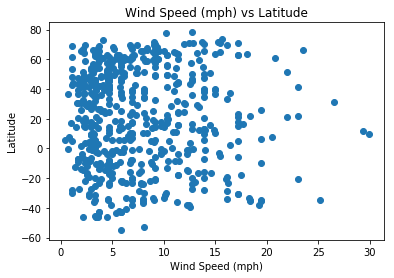

In [134]:
plt.scatter(cities_info["Wind Speed(mph)"], cities_info["Latitude"])
plt.title("Wind Speed (mph) vs Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")

## Oberservations

There is a correlation between temperature and latitude. As we get closer to the equator, the temperature increases and adversely, as move farther from the equator and closer to the poles, the temperature decreases. 

Based on the remaining plots for correlation:
    Humidity and Latitude did not have a correlation
    Cloudiness and Latitude did not have a correlation
    Wind Speed and Latitude did not have a correlation